# Problem 1

In [6]:
import matplotlib.pyplot as plt
import sys
from fft import fft as fft
import numpy as np
import math

In [7]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 150

## CO$_2$ Data

### Problem 1

The $CO_2$ data used in homework 6 was first uploaded. The x data, originally in decimal years, was converted to seconds so frequencies can be in units of Hertz.  A function, *findPeriod()*, was written to find the peaks of the $CO_2$ data and from that the period of oscillations.  A second function, *findPeaks()*, was written to calculate the frequency of the transformed data.  *findPeaks()* will be used in Part 3.

Period = 2868813.8181818184 [s]
Frequency = 3.485761235749257e-07 [Hz]


Text(0.5, 0, 'Date [s]')

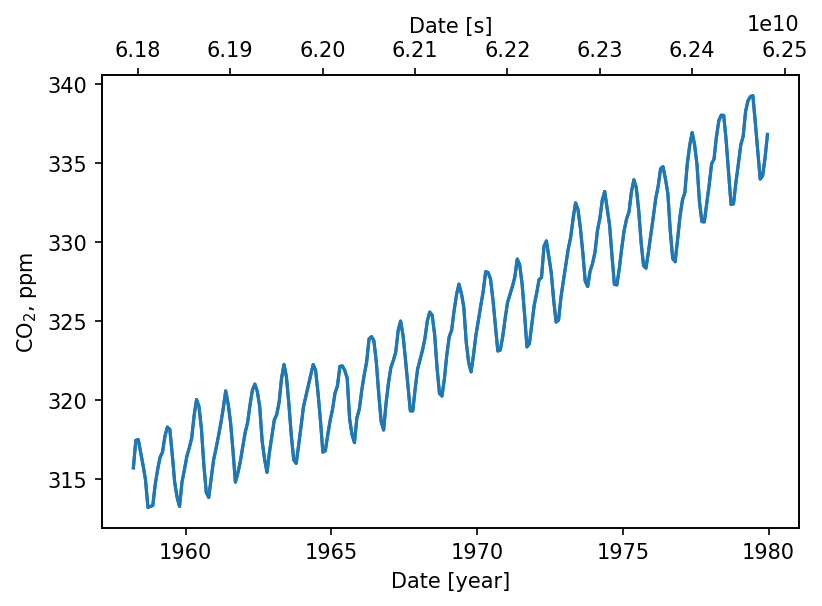

In [8]:
import p1_functions as p1

x,y = p1.read_co2_2('co2_mm_mlo.txt')

y_valid = y >= 0.
y = y[y_valid]
x = x[y_valid]

y =y[0:256]
x =x[0:256]

#Convert to seconds
x_s = x*31556952

T = p1.findPeriod(x_s, y)
P = 1/T
print("Period = "+str(T)+" [s]")
print("Frequency = "+str(P)+" [Hz]")

f1 = plt.figure(1)
ax1 = f1.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot( x, y )
ax2.plot( x_s, y)
ax1.set_ylabel('CO${_2}$, ppm')
ax1.set_xlabel('Date [year]')
ax2.set_ylabel('CO${_2}$, ppm')
ax2.set_xlabel('Date [s]')

### Part 2 - Index to Frequency Domain

A function was written in p1_functions.py to convert from the index domain to the frequency domain.  The equation,

$$ f = \frac{k}{N}, $$

was used for this conversion, where k is the x data in the index domain and N is the total number of samples.

In [9]:
freq_domain = p1.indexToFreq(x_s, len(y))

Y = fft(y)
Y_abs = abs(Y)

### Part 3 - Frequency of Data

The functions *indexToFreq()* and *findPeaks()* were used to find the frequency values for this data set.

[241633553.7735]
Peak Frequency Values: (241633553.7735 [Hz])
Peak Fourier Components: (244.46603240281848)


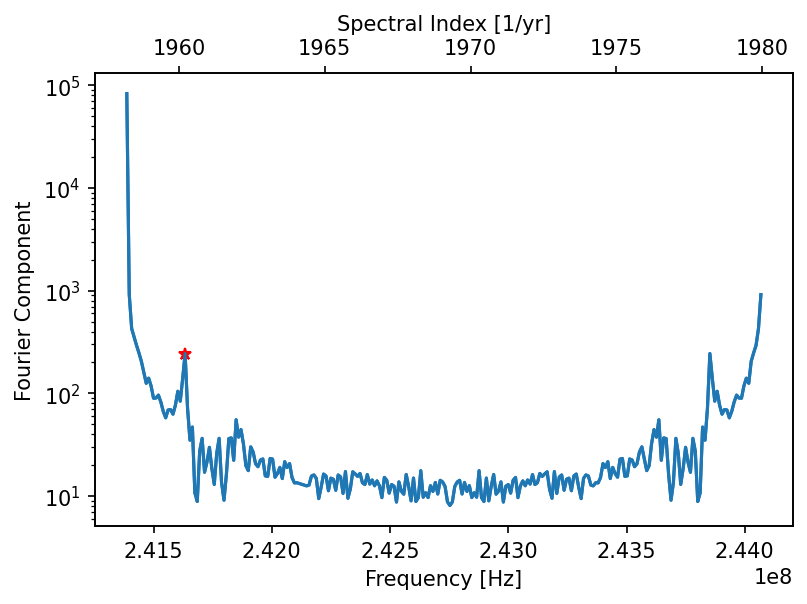

In [13]:
N = len(y)
xpeaks, Ypeaks = p1.findPeaks(freq_domain, Y_abs[:int(N/2)], 45)
print(xpeaks)
print("Peak Frequency Values: ("+str(xpeaks[0])+" [Hz])")
print("Peak Fourier Components: ("+str(Ypeaks[0])+")")

f2 = plt.figure(2)
ax3 = f2.add_subplot(111)
ax4 = ax3.twiny()
ax3.plot( freq_domain, Y_abs)
ax4.plot( x, Y_abs)
ax3.plot( xpeaks, Ypeaks, 'r*')
plt.yscale('log')
ax3.set_ylabel('Fourier Component')
ax3.set_xlabel('Frequency [Hz]')
ax4.set_xlabel('Spectral Index [1/yr]')


plt.show()